## 3.5.3 Guided example and challenge

Improve this gradient boost model as much as possible. (highest test set R^2)

In [20]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X2 = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X2.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X2[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X2[offset:], y[offset:]

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191
0.777414075286
0.752147239264


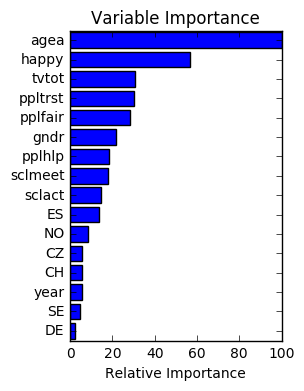

In [4]:
#lets check and plot the feature importance
feature_importance = clf.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [5]:
#Lets try the same thing again without the booleans for location since they are the worst
#features by far
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training set accuracy:
Percent Type I errors: 0.046644844517184945
Percent Type II errors: 0.17689579923622475

Test set accuracy:
Percent Type I errors: 0.06625766871165645
Percent Type II errors: 0.1901840490797546
0.776459356247
0.743558282209


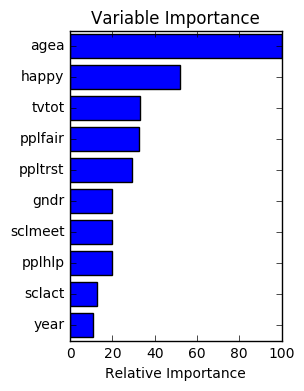

In [6]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

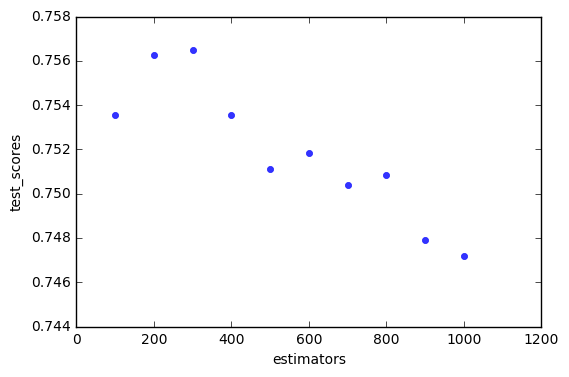

In [58]:
#lets try changing each of the parameters and seeing what the optimal values of each are
p = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
scores = []
for x in p:
    params = {'n_estimators': x,
              'max_depth': 2,
              'loss': 'exponential',
              }
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

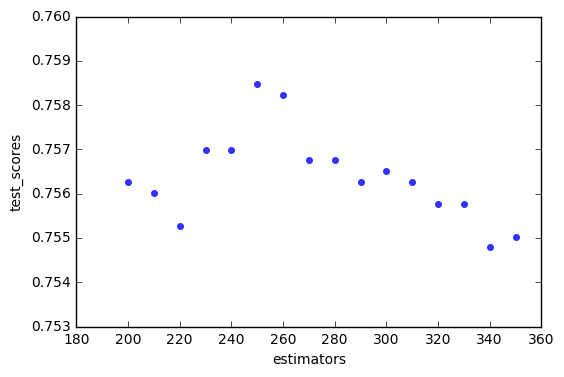

In [63]:
#this looks pretty random. it might be due to such small test size, causing high variablility
#in the set, but we are not quite sure at this point. lets zoom in at the peak
p = [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350]
scores = []
for x in p:
    params = {'n_estimators': x,
              'max_depth': 2,
              'loss': 'exponential',
              }
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

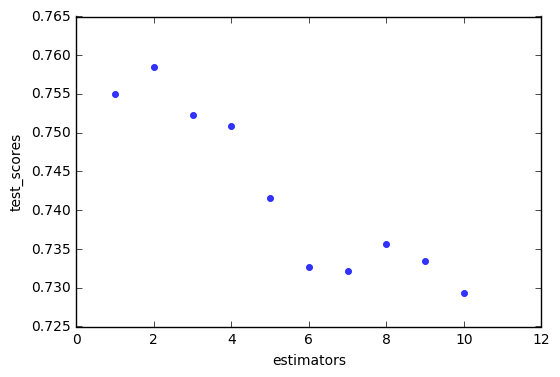

In [64]:
# zooming in creates a peak at 250, lets try changing max depth now
p = [1,2,3,4,5,6,7,8,9,10]
scores = []
for x in p:
    params = {'n_estimators': 250,
              'max_depth': x,
              'loss': 'exponential',
              }
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

In [65]:
#2 is the best. lets try the two loss types
p = ['exponential', 'deviance']
for x in p:
    params = {'n_estimators': 250,
              'max_depth': 2,
              'loss': x,
              }
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    print(x, clf.score(X_test, y_test))

exponential 0.758468335788
deviance 0.757731958763


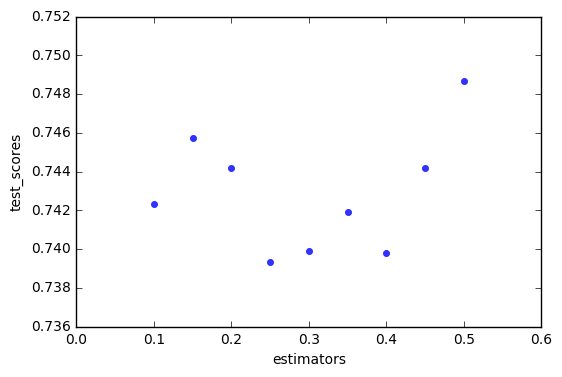

In [76]:
# those numbers are almost identical so lets try changing the test size. we are also going to go back 
#to the original data set 
p = [.1, .15, .2, .25, .3, .35, .4, .45, .5]
scores = []
for a in p:
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=a, random_state=400)
    params = {'n_estimators': 250,
          'max_depth': 2,
          'loss': 'exponential'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

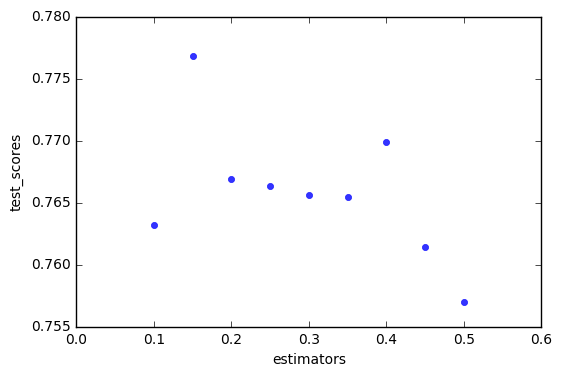

In [77]:
#lets try again with a different sample state
p = [.1, .15, .2, .25, .3, .35, .4, .45, .5]
scores = []
for a in p:
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=a, random_state=600)
    params = {'n_estimators': 250,
          'max_depth': 2,
          'loss': 'exponential'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

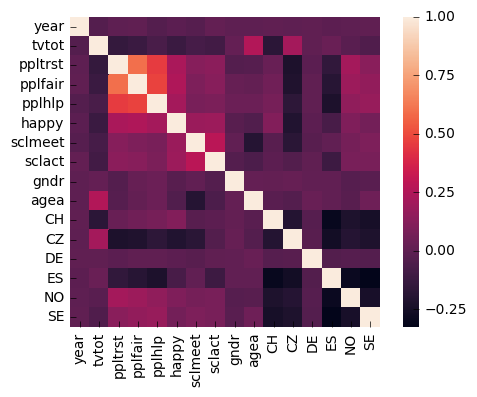

In [27]:
#these graphs aare completely different implying the random split is much more
#important than the actual size. lets try to look at feature correlation
corrmat = X2.corr()
sns.heatmap(corrmat, square=True)
plt.show()

In [35]:
#lets standardize the correlated variables and add them together
means = X2[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = X2[['ppltrst','pplfair','pplhlp']].std(axis=0)
X2['trust_fair_help'] = ((X2[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
X3 = X2.drop(['ppltrst', 'pplfair', 'pplhlp'], axis = 1)

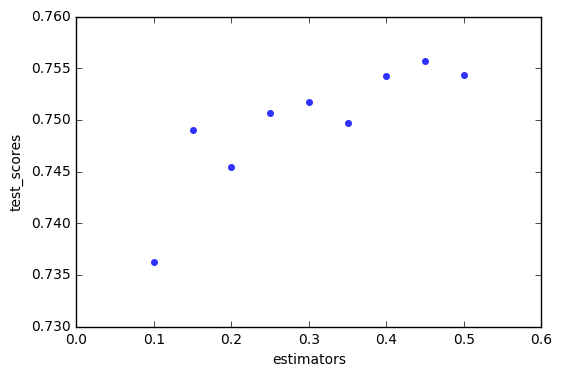

In [83]:
p = [.1, .15, .2, .25, .3, .35, .4, .45, .5]
scores = []
for a in p:
    X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=a, random_state = 135)
    params = {'n_estimators': 250,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

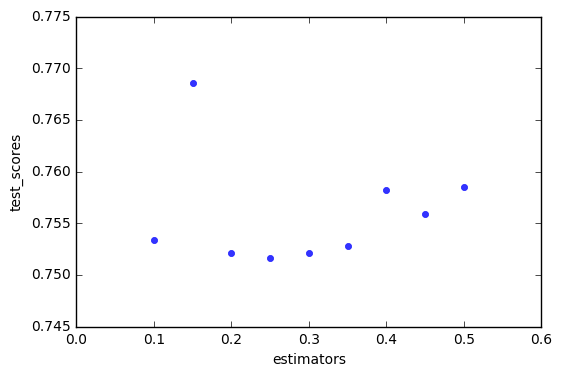

In [84]:
p = [.1, .15, .2, .25, .3, .35, .4, .45, .5]
scores = []
for a in p:
    X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=a, random_state= 257)
    params = {'n_estimators': 250,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

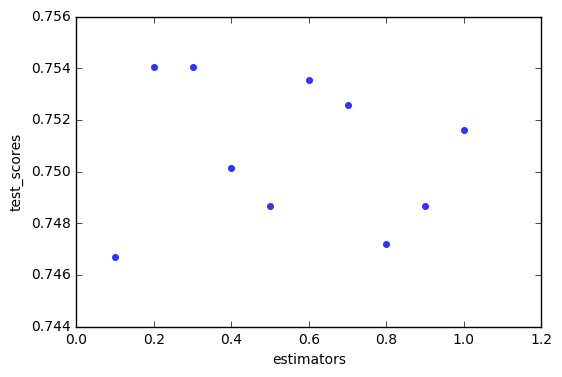

In [88]:
#again there doesnt seem to be any correlation. the last variable we are going to test is subsampling
p = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
scores = []
for a in p:
    X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=.25, random_state= 257)
    params = {'n_estimators': 250,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params, subsample = a)
    clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
ds = pd.DataFrame()
ds['estimators'] = p
ds['test_scores'] = scores
sns.regplot(x='estimators', y='test_scores', data=ds, fit_reg=False)

In [89]:
#again, there is no correlation here, so while we can increase the test confidencce by a small margin, it is only the result of the random split 
#dont by train test split and not actually because we are improving the model